In [ ]:
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj") # this line is essential to see the plots. Depends on local settings
library(CAVAanalytics) # version 3.2.5 was used
library(patchwork)
library(ggplot2)
library(tidyverse)

## Overview
This notebook fully reproduce the figures used in the paper. Tutorials on how to use CAVAanalytics can be found [here](https://risk-team.github.io/CAVAanalytics/).

## Loading CORDEX-CORE simulations and ERA5 data for Yemen

In CAVAanalytics, climate data can be downloaded with the load_data function. Type **?load_data** to find more information

In [3]:
# loading the data for 3 variables
biases= lapply(c("pr","tasmax", "tasmin"), function(x) load_data(path.to.data="CORDEX-CORE",country = "Yemen", 
years.hist = 1980:2005, years.proj = 2010, variable=x,
path.to.obs = "ERA5", domain="AFR-22"))
               
names(biases)= c("pr","tasmax", "tasmin")

ℹ Accessing inventory

✔ Accessing inventory [6.5s]



ℹ Downloading CORDEX-CORE data (18 simulations) using 6 sessions by default

✔ Downloading CORDEX-CORE data (18 simulations) using 6 sessions by default …



→ Downloaded 678.95 MB

ℹ Making multi-model ensemble and checking temporal consistency

✔ Making multi-model ensemble and checking temporal consistency [18.1s]



ℹ Downloading ERA5

✔ Downloading ERA5  47.5s]



→ Precipitation data from CORDEX-CORE has been converted into mm/day

→ Precipitation data from ERA5 has been converted into mm/day

ℹ Accessing inventory

✔ Accessing inventory [1.3s]



ℹ Downloading CORDEX-CORE data (18 simulations) using 6 sessions by default

✔ Downloading CORDEX-CORE data (18 simulations) using 6 sessions by default …



→ Downloaded 678.95 MB

ℹ Making multi-model ensemble and checking temporal consistency

✔ Making multi-model ensemble and checking temporal consistency [12.2s]



ℹ Downloading ERA5

✔ Downloading ERA5  8.4s]



→ Temperature 

In [2]:
# saving and loading the data, if necessary.
load("biases.rda")

## Figure 2
Observed climatology and trends

In [3]:
# Climatology for precipitation related indices. 
PRCPTOT=observations(biases$pr, season=list(1:12))
dd= observations(biases$pr, season=list(1:12), lowert=1)
r20= observations(biases$pr, season=list(1:12), uppert=20)
cdd= observations(biases$pr, season=list(1:12), lowert=1, duration="max", consecutive = T)
cwd= observations(biases$pr, season=list(1:12), uppert=1, duration="max", consecutive = T)

# Climatology for temperature related indices
su= observations(biases$tasmax, season=list(1:12), uppert=25)
tr= observations(biases$tasmin, season=list(1:12), uppert=20)
hwvs= observations(biases$tasmax, season=list(1:12), uppert=35, consecutive=T, frequency=T, duration=3)

# Precipitation indexes (trends)
PRCPTOT_t=observations(biases$pr, season=list(1:12), trends=T)
dd_t= observations(biases$pr, season=list(1:12),  lowert=1, trends=T)
r20_t= observations(biases$pr, season=list(1:12),  uppert=20, trends=T)
cdd_t= observations(biases$pr, season=list(1:12), lowert=1, duration="max", consecutive = T,  trends=T)
cwd_t= observations(biases$pr, season=list(1:12), uppert=1, duration="max", consecutive = T,  trends=T)

# Temperature indexes (trends)
su_t= observations(biases$tasmax, season=list(1:12), uppert=25, trends=T)
tr_t= observations(biases$tasmin, season=list(1:12), uppert=20, trends=T)
hwvs_t= observations(biases$tasmax, season=list(1:12), uppert=35, consecutive=T, frequency=T, duration=3, trends=T)



→ observations, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total pr

ℹ Performing calculations

✔ Performing calculations [5.4s]



→ observations, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of number of
days with pr below threshold of 1

ℹ Performing calculations

✔ Performing calculations [1.2s]



→ observations, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of number of
days with pr above threshold of 20

ℹ Performing calculations

✔ Performing calculations [1.1s]



→ observations, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of maximum
length of consecutive number of days below 1

ℹ Performing calculations

✔ Performing calculations [2.4s]



→ observations, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of maximum
length of consecutive number of days above 1

ℹ Performing calculations

Warning message:
“There were 1372 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `obs_agg_y = purrr::map(...)`.
Caused by warning in `max()`:
! no non-missing a

## Visualizing the results for Figure 2

In [23]:
# precipitation indexes
PRCPTOT_plt= plotting(PRCPTOT, plot_titles = "mm", palette = IPCC_palette(type = "pr", divergent = F), legend_range=c(0,1800))+
remove_facets(position = "both")+
ggtitle("PRCPTOT")+
theme(plot.title = element_text(size=10, hjust = 0.5))

PRCPTOT_t_plt= plotting(PRCPTOT_t, plot_titles = "mm/year", palette = IPCC_palette(type = "pr", divergent = T), legend_range=c(-8,8))+
remove_facets(position = "both")+
ggtitle("PRCPTOT trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

dd_plt= plotting(dd, plot_titles = "N° days", palette = rev(IPCC_palette(type = "pr", divergent = F)))+
remove_facets(position = "both")+
ggtitle("DD")+
theme(plot.title = element_text(size=10, hjust = 0.5))

dd_t_plt= plotting(dd_t, plot_titles = "N° days/year", palette = rev(IPCC_palette(type = "pr", divergent = T)), legend_range=c(-2,2))+
remove_facets(position = "both")+
ggtitle("DD trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

r20_plt= plotting(r20, plot_titles = "N° days", palette = IPCC_palette(type = "pr", divergent = F))+
remove_facets(position = "both")+
ggtitle("R20")+
theme(plot.title = element_text(size=10, hjust = 0.5))

r20_t_plt= plotting(r20_t, plot_titles = "N° days/year", palette = IPCC_palette(type = "pr", divergent = T), legend_range=c(-2,2))+
remove_facets(position = "both")+
ggtitle("R20 trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))


cdd_plt= plotting(cdd, plot_titles = "N° days", palette = rev(IPCC_palette(type = "pr", divergent = F)))+
remove_facets(position = "both")+
ggtitle("CDD")+
theme(plot.title = element_text(size=10, hjust = 0.5))

cdd_t_plt= plotting(cdd_t, plot_titles = "N° days/year", palette = rev(IPCC_palette(type = "pr", divergent = T)), legend_range=c(-5,5))+
remove_facets(position = "both")+
ggtitle("CDD trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

cwd_plt= plotting(cwd, plot_titles = "N° days", palette = IPCC_palette(type = "pr", divergent = F))+
remove_facets(position = "both")+
ggtitle("CWD")+
theme(plot.title = element_text(size=10, hjust = 0.5))

cwd_t_plt= plotting(cwd_t, plot_titles = "N° days/year", palette = IPCC_palette(type = "pr", divergent = T), legend_range=c(-2,2))+
remove_facets(position = "both")+
ggtitle("CWD trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

# Temperature indexes

su_plt= plotting(su, plot_titles = "N° days", palette = IPCC_palette(type = "tmp", divergent = F))+
remove_facets(position = "both")+
ggtitle("SU")+
theme(plot.title = element_text(size=10, hjust = 0.5))

su_t_plt= plotting(su_t, plot_titles = "N° days/year", palette = IPCC_palette(type = "tmp", divergent = T), legend_range=c(-5,5))+
remove_facets(position = "both")+
ggtitle("SU trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

tr_plt= plotting(tr, plot_titles = "N° days", palette = IPCC_palette(type = "tmp", divergent = F))+
remove_facets(position = "both")+
ggtitle("TR")+
theme(plot.title = element_text(size=10, hjust = 0.5))

tr_t_plt= plotting(tr_t, plot_titles = "N° days/year", palette = IPCC_palette(type = "tmp", divergent = T),  legend_range=c(-3,3))+
remove_facets(position = "both")+
ggtitle("TR trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))

hwvs_plt= plotting(hwvs, plot_titles = "N°", palette = IPCC_palette(type = "tmp", divergent = F))+
remove_facets(position = "both")+
ggtitle("HWVS")+
theme(plot.title = element_text(size=10, hjust = 0.5))

hwvs_t_plt= plotting(hwvs_t, plot_titles = "N°/year", palette = IPCC_palette(type = "tmp", divergent = T), legend_range=c(-0.35,0.35))+
remove_facets(position = "both")+
ggtitle("HWVS trends")+
theme(plot.title = element_text(size=10, hjust = 0.5))



ℹ Plotting

→ Visualizing observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing linear regression results for the observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing linear regression results for the observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing linear regression results for the observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plotting
✔ Plotting s]



ℹ Plotting

→ Visualizing observational dataset

ℹ Plotting
!  Argument ensemble and stat are ignored

ℹ Plottin

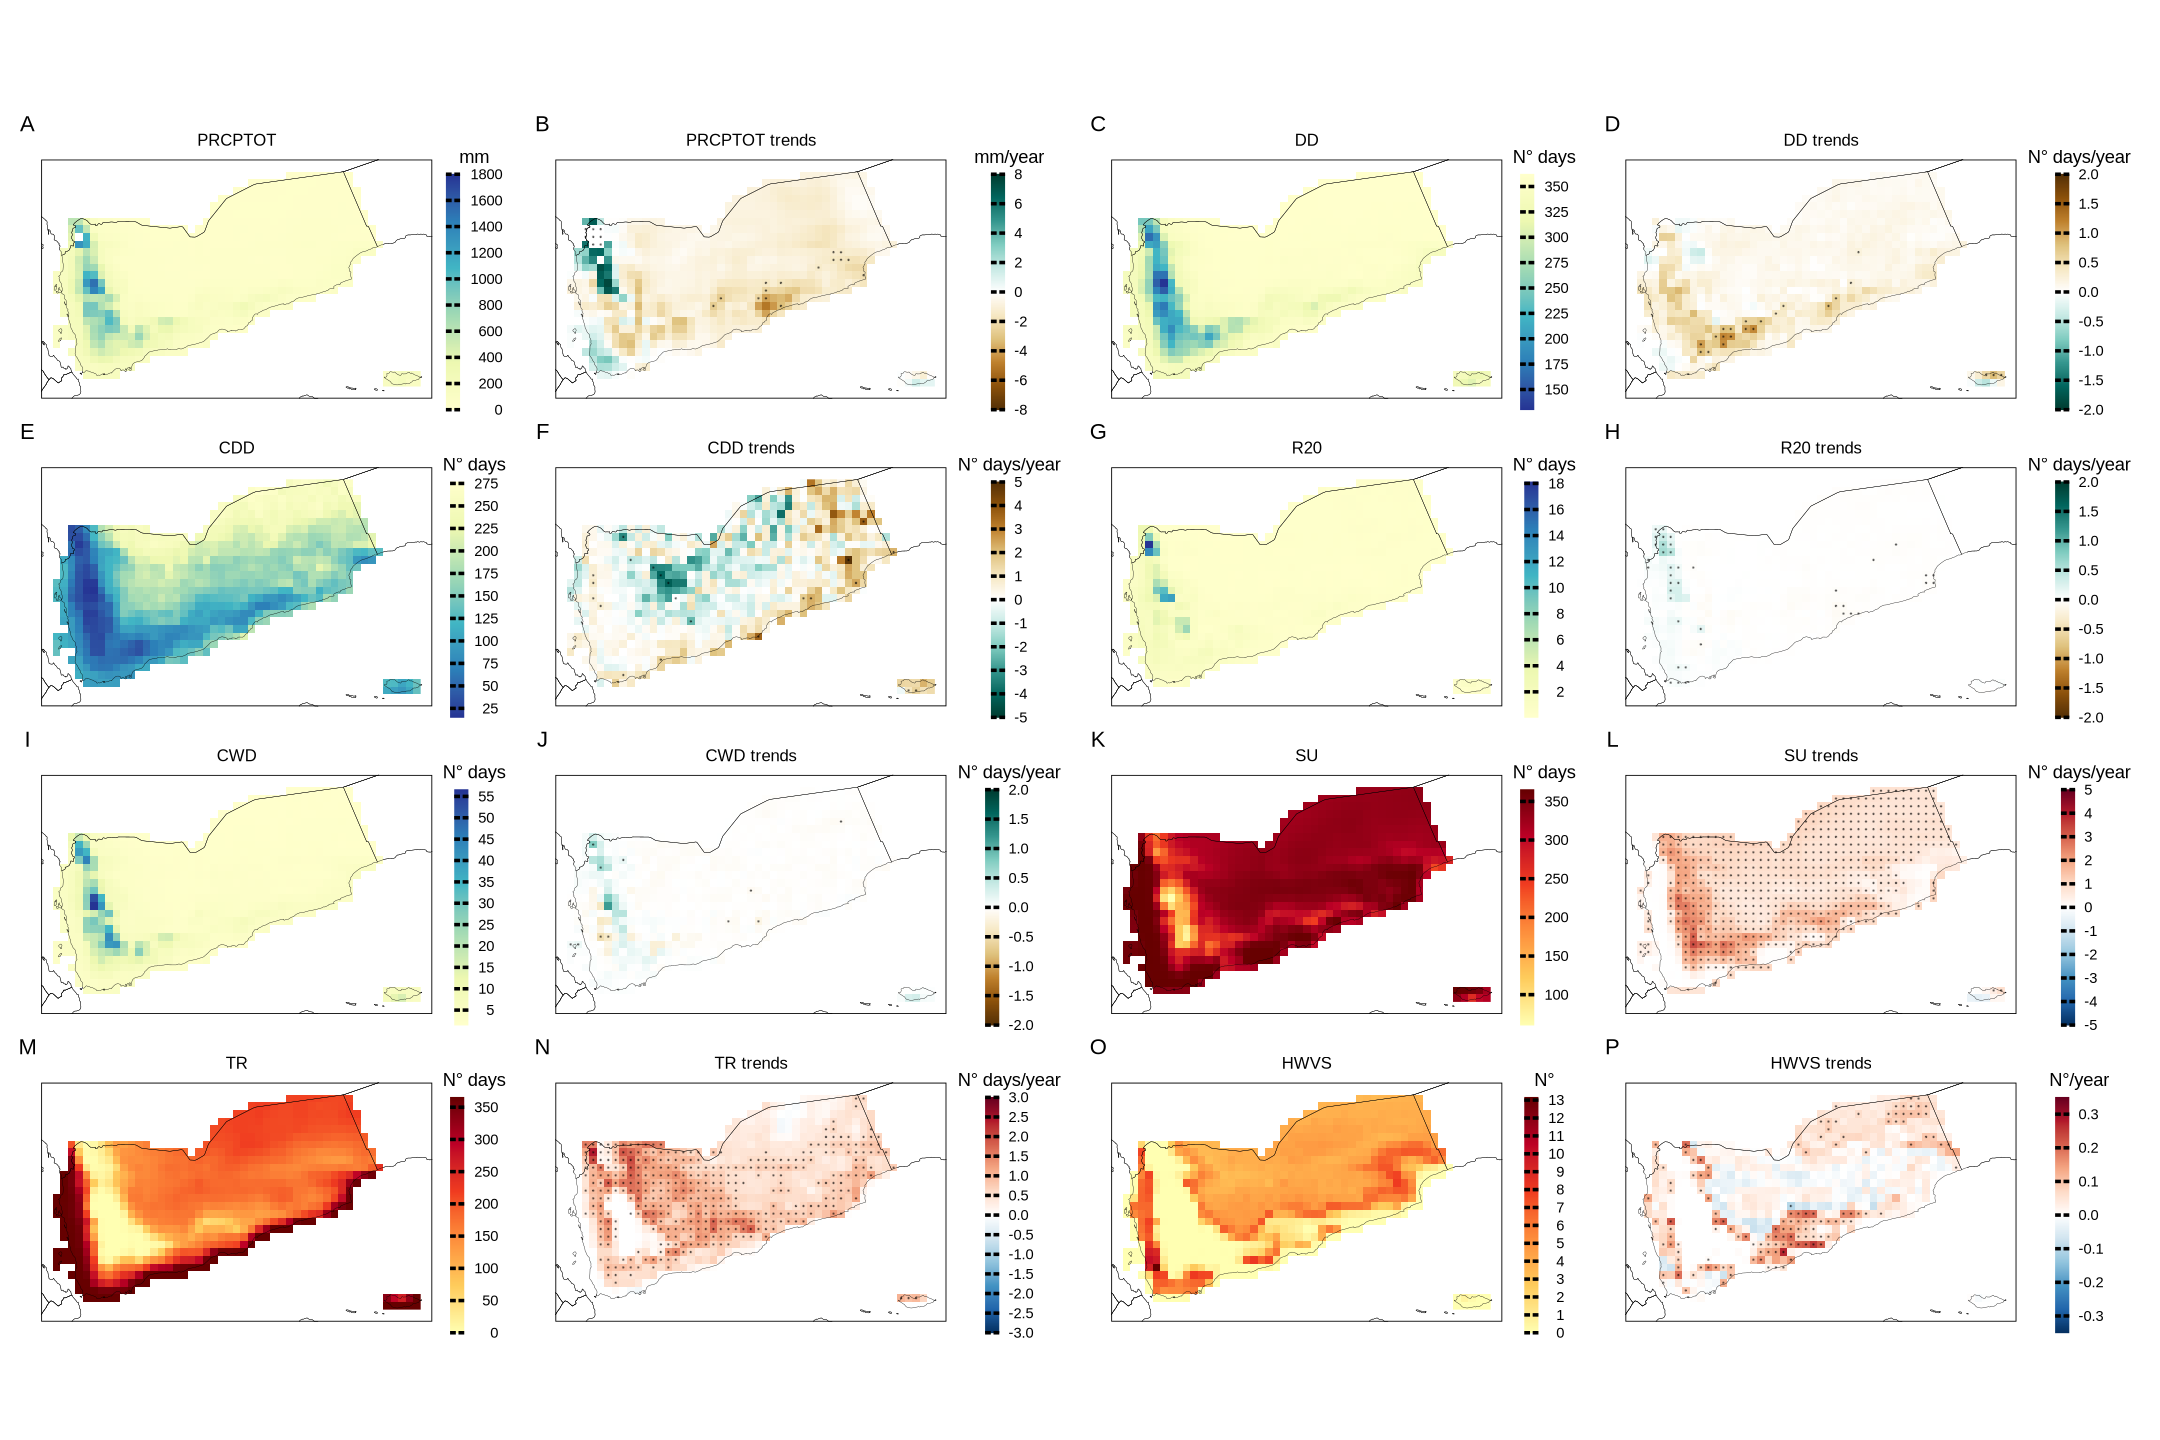

In [165]:
options(repr.plot.width = 18, repr.plot.height = 12)
fig2=PRCPTOT_plt+PRCPTOT_t_plt+dd_plt+dd_t_plt+cdd_plt+cdd_t_plt+r20_plt+r20_t_plt+ cwd_plt+ cwd_t_plt+ su_plt+ su_t_plt+ tr_plt+ tr_t_plt+
hwvs_plt+hwvs_t_plt+ plot_layout(ncol = 4, nrow = 4)+plot_annotation(tag_levels = 'A')
fig2


In [ ]:
ggsave(fig2, filename = "F_2.png", width=18, height=12)

## Figure 3 and 4
In figure 3 and 4 we analyse model biases. This can be done using the model_biases function. For a full documentation, run ?model_biases

In [25]:
# Precipitation related indices
PRCPTOT_biases= model_biases(biases$pr, season=list(1:12), n.sessions = 3)
PRCPTOT_biases.bs= model_biases(biases$pr, season=list(1:12), bias.correction = T, n.sessions = 3, cross_validation="3fold")

dd_biases= model_biases(biases$pr, season=list(1:12), lowert=1)
dd_biases.bs= model_biases(biases$pr, season=list(1:12), lowert=1, bias.correction=T, n.sessions = 3, cross_validation="3fold")

r20_biases= model_biases(biases$pr, season=list(1:12), uppert=20)
r20_biases.bs= model_biases(biases$pr, season=list(1:12), uppert=20, bias.correction=T, n.sessions = 3, cross_validation="3fold")

cdd_biases= model_biases(biases$pr, season=list(1:12), lowert=1, consecutive=T, duration="max", n.sessions = 3)
cdd_biases.bs= model_biases(biases$pr, season=list(1:12), lowert=1, consecutive=T, duration="max", bias.correction=T, n.sessions = 3, cross_validation="3fold")

cwd_biases= model_biases(biases$pr, season=list(1:12), uppert=1, consecutive=T, duration="max")
cwd_biases.bs= model_biases(biases$pr, season=list(1:12), uppert=1, consecutive=T, duration="max", bias.correction = T, n.sessions = 3, cross_validation="3fold")

# Temperature related indeces
su_biases= model_biases(biases$tasmax, season=list(1:12), uppert=25, n.sessions = 3)
su_biases.bs= model_biases(biases$tasmax, season=list(1:12), uppert=25, bias.correction = T, n.sessions = 3, cross_validation="3fold")

tr_biases= model_biases(biases$tasmin, season=list(1:12), uppert=20)
tr_biases.bs= model_biases(biases$tasmin, season=list(1:12), uppert=20, bias.correction = T, n.sessions = 3, cross_validation="3fold")

hwvs_biases= model_biases(biases$tasmax, season=list(1:12), uppert=35, consecutive=T, frequency=T, duration=3, n.sessions = 3)
hwvs_biases.bs= model_biases(biases$tasmax, season=list(1:12), uppert=35, consecutive=T, frequency=T, duration=3, bias.correction = T, n.sessions = 3, cross_validation="3fold")

! Observations and model simulations have the same spatial resolution, proceeding with calculations

→ Model biases, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of model biases
for total pr

ℹ Performing calculations

✔ Performing calculations [25.7s]



! Observations and model simulations have the same spatial resolution, proceeding with calculations

→ Model biases, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of model biases
for total bias-corrected pr

ℹ Performing calculations

→ Performing monthly bias correction with the eqm method, for each model
separately. This can take a while. Season 1-2-3-4-5-6-7-8-9-10-11-12 . kfold
cross-validation is applied to avoid overfitting

ℹ Performing calculations
✔ Performing calculations  50.5s]



! Observations and model simulations have the same spatial resolution, proceeding with calculations

→ Model biases, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of model biases
for number of days with pr below threshold of 1

ℹ Performing c

## Visualizing the results for Figure 3 and 4

In [63]:
a= plotting(PRCPTOT_biases, ensemble=F, plot_titles = "mm", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-1800,1800))+
remove_facets(position = "both")+
ylab("PRCPTOT")+
theme(axis.title.y = element_text(size=8))

a.bs= plotting(PRCPTOT_biases.bs, ensemble=F, plot_titles = "mm", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-1800,1800))+
remove_facets(position = "both")+
ylab("PRCPTOT bc")+
theme(axis.title.y = element_text(size=8))


b= plotting(dd_biases, ensemble=F, plot_titles = "N° days", palette = rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("DD")+
theme(axis.title.y = element_text(size=8))

b.bs= plotting(dd_biases.bs, ensemble=F, plot_titles = "N° days", palette = rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("DD bc")+
theme(axis.title.y = element_text(size=8))


c= plotting(r20_biases, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-40,40))+
remove_facets(position = "both")+
ylab("R20")+
theme(axis.title.y = element_text(size=8))

c.bs= plotting(r20_biases.bs, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-40,40))+
remove_facets(position = "both")+
ylab("R20 bc")+
theme(axis.title.y = element_text(size=8))


d= plotting(cdd_biases, ensemble=F, plot_titles = "N° days", palette = rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("CDD")+
theme(axis.title.y = element_text(size=8))


d.bs= plotting(cdd_biases.bs, ensemble=F, plot_titles = "N° days", palette = rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("CDD bc")+
theme(axis.title.y = element_text(size=8))


e= plotting(cwd_biases, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-60,60))+
remove_facets(position = "both")+
ylab("CWD")+
theme(axis.title.y = element_text(size=8))


e.bs= plotting(cwd_biases.bs, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="pr", divergent=T), legend_range = c(-60,60))+
remove_facets(position = "both")+
ylab("CWD bc")+
theme(axis.title.y = element_text(size=8))


f= plotting(su_biases, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="tmp", divergent=T), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("SU")+
theme(axis.title.y = element_text(size=8))


f.bs= plotting(su_biases.bs, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="tmp", divergent=T), legend_range = c(-200,200))+
remove_facets(position = "both")+
ylab("SU bc")+
theme(axis.title.y = element_text(size=8))

g= plotting(tr_biases, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="tmp", divergent=T), legend_range = c(-250,250))+
remove_facets(position = "both")+
ylab("TR")+
theme(axis.title.y = element_text(size=8))

g.bs= plotting(tr_biases.bs, ensemble=F, plot_titles = "N° days", palette = IPCC_palette(type="tmp", divergent=T), legend_range = c(-250,250))+
remove_facets(position = "both")+
ylab("TR bc")+
theme(axis.title.y = element_text(size=8))

h= plotting(hwvs_biases, ensemble=F, plot_titles = "N°", palette = IPCC_palette(type="tmp", divergent=T), legend_range = c(-10,10))+
remove_facets(position = "both")+
ylab("HWVS")+
theme(axis.title.y = element_text(size=8))

h.bs= plotting(hwvs_biases.bs, ensemble=F, plot_titles = "N°", palette = IPCC_palette(type="tmp", divergent=T),legend_range = c(-10,10))+
remove_facets(position = "both")+
ylab("HWVS bc")+
theme(axis.title.y = element_text(size=8))


→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]



→ Visualizing individual member spatial biases

ℹ Plotting

✔ Plotting s]




In [83]:
fig3=a+a.bs+b+b.bs+d+d.bs+c+c.bs+e+e.bs+plot_layout(ncol = 2, nrow=5)+plot_annotation(tag_levels = 'A')
fig4=f+f.bs+g+g.bs+h+h.bs+plot_layout(ncol = 2, nrow=3)+plot_annotation(tag_levels = 'A')

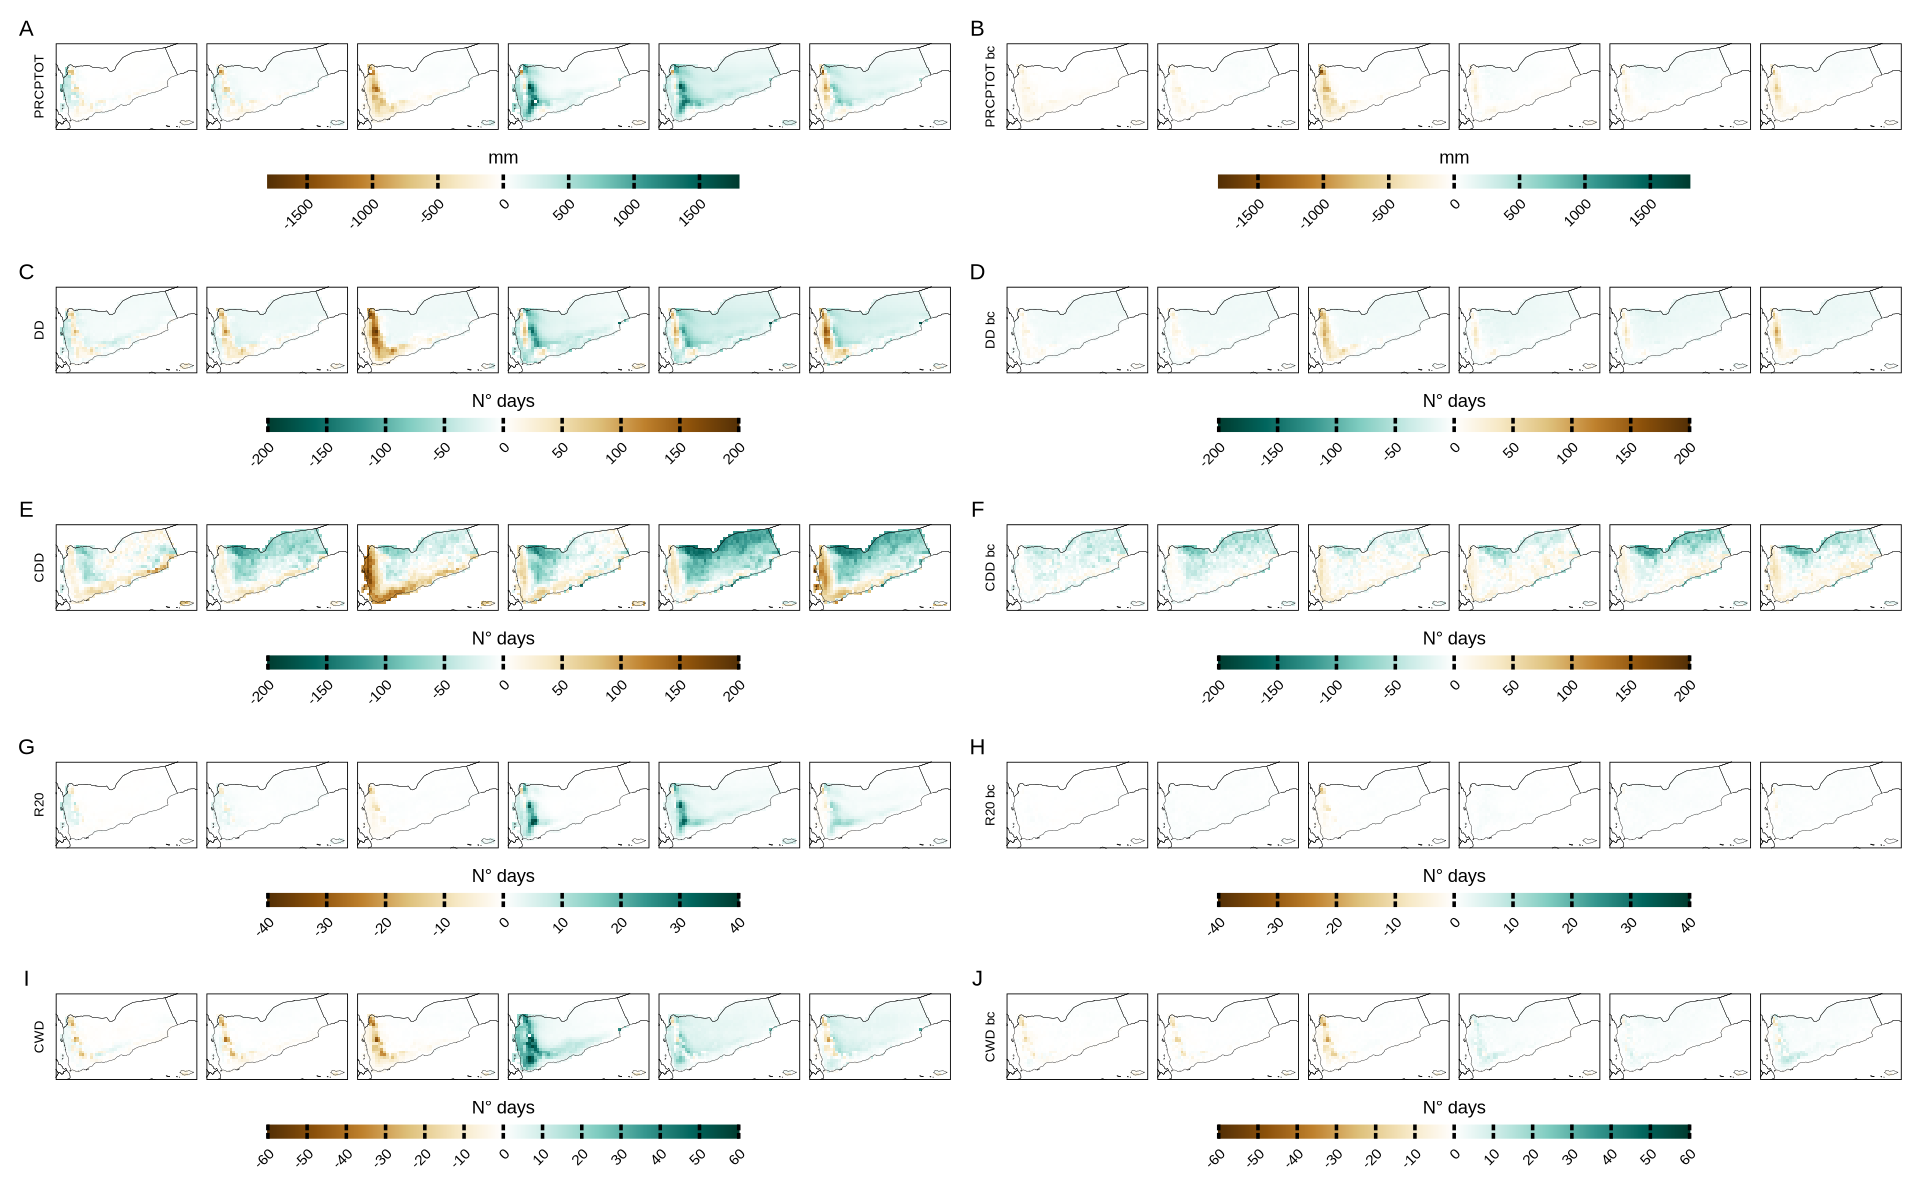

In [84]:
options(repr.plot.width = 16, repr.plot.height = 10)
fig3

In [85]:
ggsave(fig3, filename = "F_3.png", width = 16, height = 10)

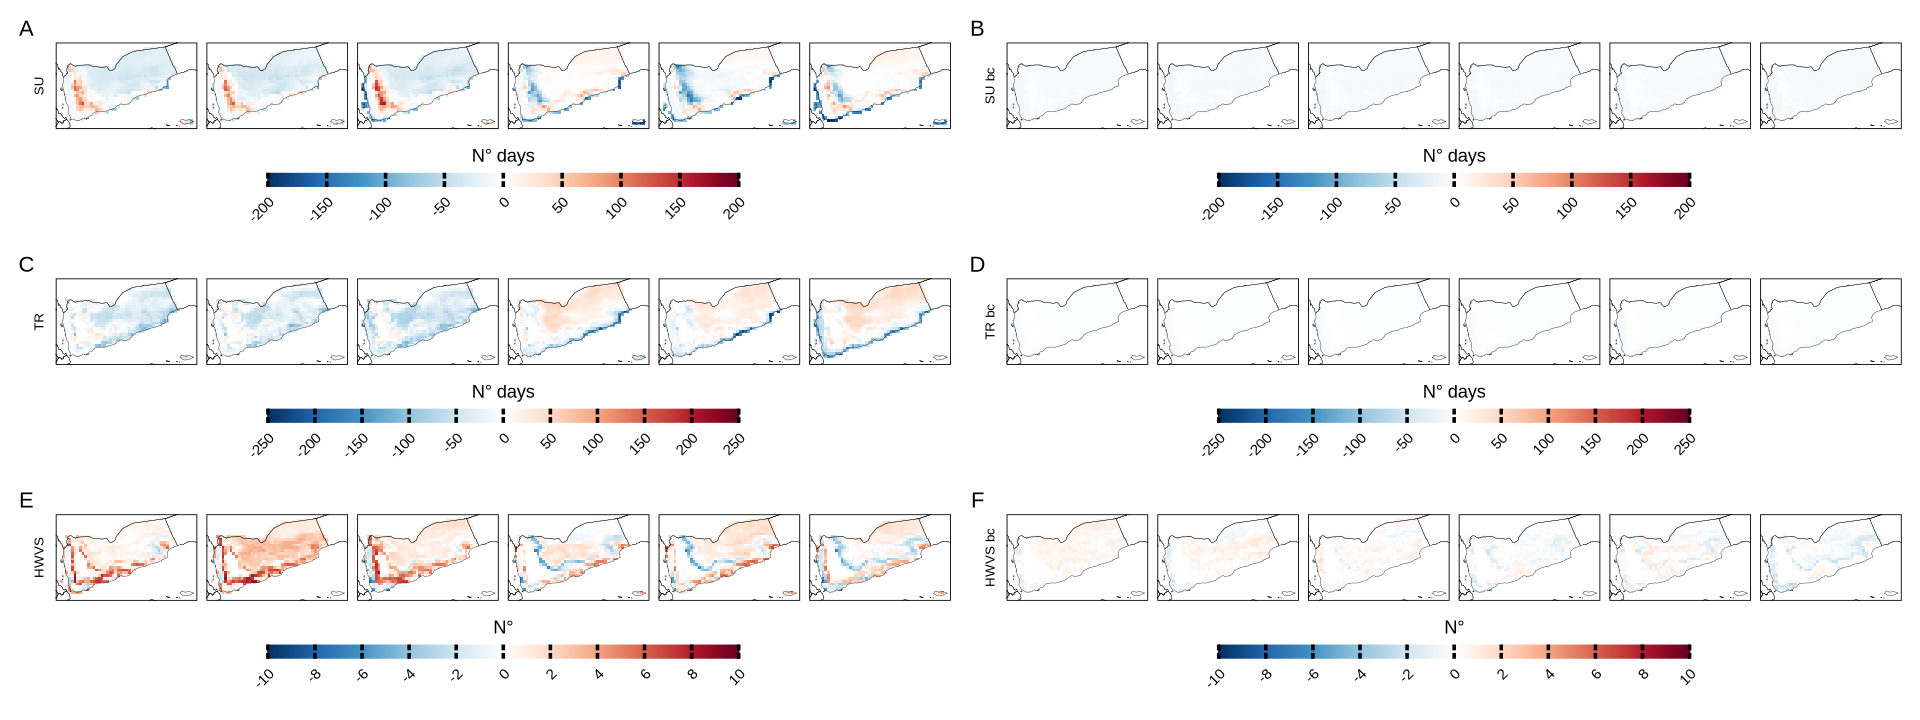

In [78]:
options(repr.plot.width = 16, repr.plot.height = 6)
fig4

In [80]:
ggsave(fig4, filename = "F_4.png", width = 16, height = 6)

## Figure 5
Climate change signal

In [79]:
# load the data for projections up until the end of the century
pr=load_data(country = "Yemen", path.to.data="CORDEX-CORE",
years.hist = 1980:2005, years.proj = 2010:2099, years.obs = 1990:2019, variable="pr", path.to.obs = "ERA5", domain="AFR-22")
save(pr, file="pr.rdata") # optional

tasmin=load_data_hub(country = "Yemen", path.to.data="CORDEX-CORE",
years.hist = 1980:2005, years.proj = 2010:2099, years.obs = 1990:2019, variable="tasmin", path.to.obs = "ERA5", domain="AFR-22")
save(tasmin, file="tasmin.rdata") # optional

tasmax= load_data_hub(country = "Yemen", path.to.data="CORDEX-CORE",
years.hist = 1980:2005, years.proj = 2010:2099, years.obs = 1990:2019, variable="tasmax", path.to.obs = "ERA5", domain="AFR-22")
save(tasmax, file="tasmax.rdata") # optional


! years.obs overwrite years.hist for the observational dataset

ℹ Accessing inventory

✖ Accessing inventory [6.9s]





In [82]:
# load the saved data if needed
load("pr.rdata")
load("tasmax.rdata")
load("tasmin.rdata")

In [97]:
# subselecting years to have 3 time frames. Precipitation indexes
PRCPTOT_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(pr, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), threshold=0.8, bias.correction=T)
    
})
DD_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(pr, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), lowert=1, bias.correction=T, threshold=0.8)
    })

R20_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(pr, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), uppert=20, bias.correction=T, threshold=0.8)
    })
CDD_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(pr, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), lowert=1, consecutive=T, duration="max", bias.correction=T, threshold=0.8)
    })
CWD_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(pr, years = time, projections = T) %>%
    climate_change_signal(., season=list(1:12), uppert=1, consecutive=T, duration="max", bias.correction=T, threshold=0.8)
    })



ℹ Performing calculations

✔ Performing calculations [11.7s]



→ climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Model agreement
calculated based on 80% threshold. Climate change signal for total pr

ℹ Performing calculations

→ Performing monthly bias correction with the eqm method, for each model
separately. This can take a while. Season 1-2-3-4-5-6-7-8-9-10-11-12

ℹ Performing calculations
 ■■■■■■■■■■■                       33% |  ETA: 12m

 ■■■■■■■■■■■■■■■■■■■■■             67% |  ETA:  6m

ℹ Performing calculations
✔ Performing calculations  15.6s]



ℹ Performing calculations

✔ Performing calculations [11.7s]



→ climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Model agreement
calculated based on 80% threshold. Climate change signal for total pr

ℹ Performing calculations

→ Performing monthly bias correction with the eqm method, for each model
separately. This can take a while. Season 1-2-3-4-5-6-7-8-9-10-11-12

ℹ Performing calculations
 ■■■■■■■■■■■       

ERROR: [1m[33mError[39m in `check_inputs()`:[22m
[1m[22m[31m✖[39m Specify only one threshold argument


In [100]:
# subselecting years to have 3 time frames. Temperature indeces
SU_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(tasmax, years = time, projections = T) %>%
    climate_change_signal(., season=list(1:12), uppert=25, bias.correction=T, threshold=0.8)
    })

TR_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(tasmin, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), uppert=20, bias.correction=T, threshold=0.8)
    })

hwvs_ccs= lapply(list(2010:2039, 2040:2069, 2070:2099), function(time) {
years_selection(tasmax, years = time, projections = T) %>%
climate_change_signal(., season=list(1:12), uppert=35, consecutive=T, frequency=T, duration=3, bias.correction=T, threshold=0.8)
 })

ℹ Performing calculations

✔ Performing calculations [11.1s]



→ climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Model agreement
calculated based on 80% threshold. Climate change signal for number of days
with tasmax above threshold of 25 after bias-correction

ℹ Performing calculations

→ Performing monthly bias correction with the eqm method, for each model
separately. This can take a while. Season 1-2-3-4-5-6-7-8-9-10-11-12

ℹ Performing calculations
 ■■■■■■■■■■■                       33% |  ETA:  9m

 ■■■■■■■■■■■■■■■■■■■■■             67% |  ETA:  5m

ℹ Performing calculations
✔ Performing calculations  2.6s]



ℹ Performing calculations

✔ Performing calculations [10.7s]



→ climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Model agreement
calculated based on 80% threshold. Climate change signal for number of days
with tasmax above threshold of 25 after bias-correction

ℹ Performing calculations

→ Performing monthly bias correction with the eqm method, for eac

## Visualizing the results for Figure 5

In [147]:
# Figure 5 A
a1=plotting(PRCPTOT_ccs[[1]],plot_titles="Δ mm", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-179,179))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("PRCPTOT")+
theme(legend.position = "none") 

a2=plotting(PRCPTOT_ccs[[2]],plot_titles="Δ mm", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-179,179))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

a3=plotting(PRCPTOT_ccs[[3]],plot_titles="Δ mm", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-179,179))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [148]:
# Figure 5 B
b1=plotting(DD_ccs[[1]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-32,32))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("DD")+
theme(legend.position = "none")

b2=plotting(DD_ccs[[2]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-32,32))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

b3=plotting(DD_ccs[[3]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-32,32))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [149]:
# Figure 5 C
c1=plotting(CDD_ccs[[1]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-30,30))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("CDD")+
theme(legend.position = "none")

c2=plotting(CDD_ccs[[2]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-30,30))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

c3=plotting(CDD_ccs[[3]],plot_titles="Δ N° days", palette=rev(IPCC_palette(type="pr", divergent=T)), legend_range = c(-30,30))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [150]:
# Figure 5 D
d1=plotting(R20_ccs[[1]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-2,2))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("R20")+
theme(legend.position = "none")

d2=plotting(R20_ccs[[2]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-2,2))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

d3=plotting(R20_ccs[[3]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-2,2))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [151]:
#Figure 5 E
e1=plotting(CWD_ccs[[1]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-8,8))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("CWD")+
theme(legend.position = "none")

e2=plotting(CWD_ccs[[2]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-8,8))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

e3=plotting(CWD_ccs[[3]],plot_titles="Δ N° days", palette=IPCC_palette(type="pr", divergent=T), legend_range = c(-8,8))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')



ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [152]:
# Figure 5 F
f1=plotting(SU_ccs[[1]],plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-190,190))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("SU")+
theme(legend.position = "none")

f2=plotting(SU_ccs[[2]],plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-190,190))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

f3=plotting(SU_ccs[[3]],plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-190,190))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [153]:
# Figure 5 G
g1=plotting(TR_ccs[[1]],plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-200,200))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("TR")+
theme(legend.position = "none")

g2=plotting(TR_ccs[[2]], plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-200,200))+
remove_facets(position = "y")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+
theme(legend.position = "none")+plot_layout(tag_level = 'new')

g3=plotting(TR_ccs[[3]],plot_titles="Δ N° days", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-200,200))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')


ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



In [161]:
# Figure 5 H
h1=plotting(hwvs_ccs[[1]],plot_titles="Δ N°", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-9,9))+
remove_facets(position = "y")+
theme(legend.position = "none")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2010-2039")+
ggtitle("HWVS")

h2=plotting(hwvs_ccs[[2]],plot_titles="Δ N°", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-9,9))+
remove_facets(position = "y")+
theme(legend.position = "none")+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2040-2069")+plot_layout(tag_level = 'new')

h3=plotting(hwvs_ccs[[3]],plot_titles="Δ N°", palette=IPCC_palette(type="tmp", divergent=T), legend_range = c(-9,9))+
rename_facets(current_label = "JFMAMJJASOND", new_label = "2070-2099")+plot_layout(tag_level = 'new')




ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE

ℹ Plotting

→ Visualizing ensemble mean and agreement in the sign of change

ℹ Plotting
✔ Plotting s]



! Customise_facets can only be used with ensemble equal TRUE



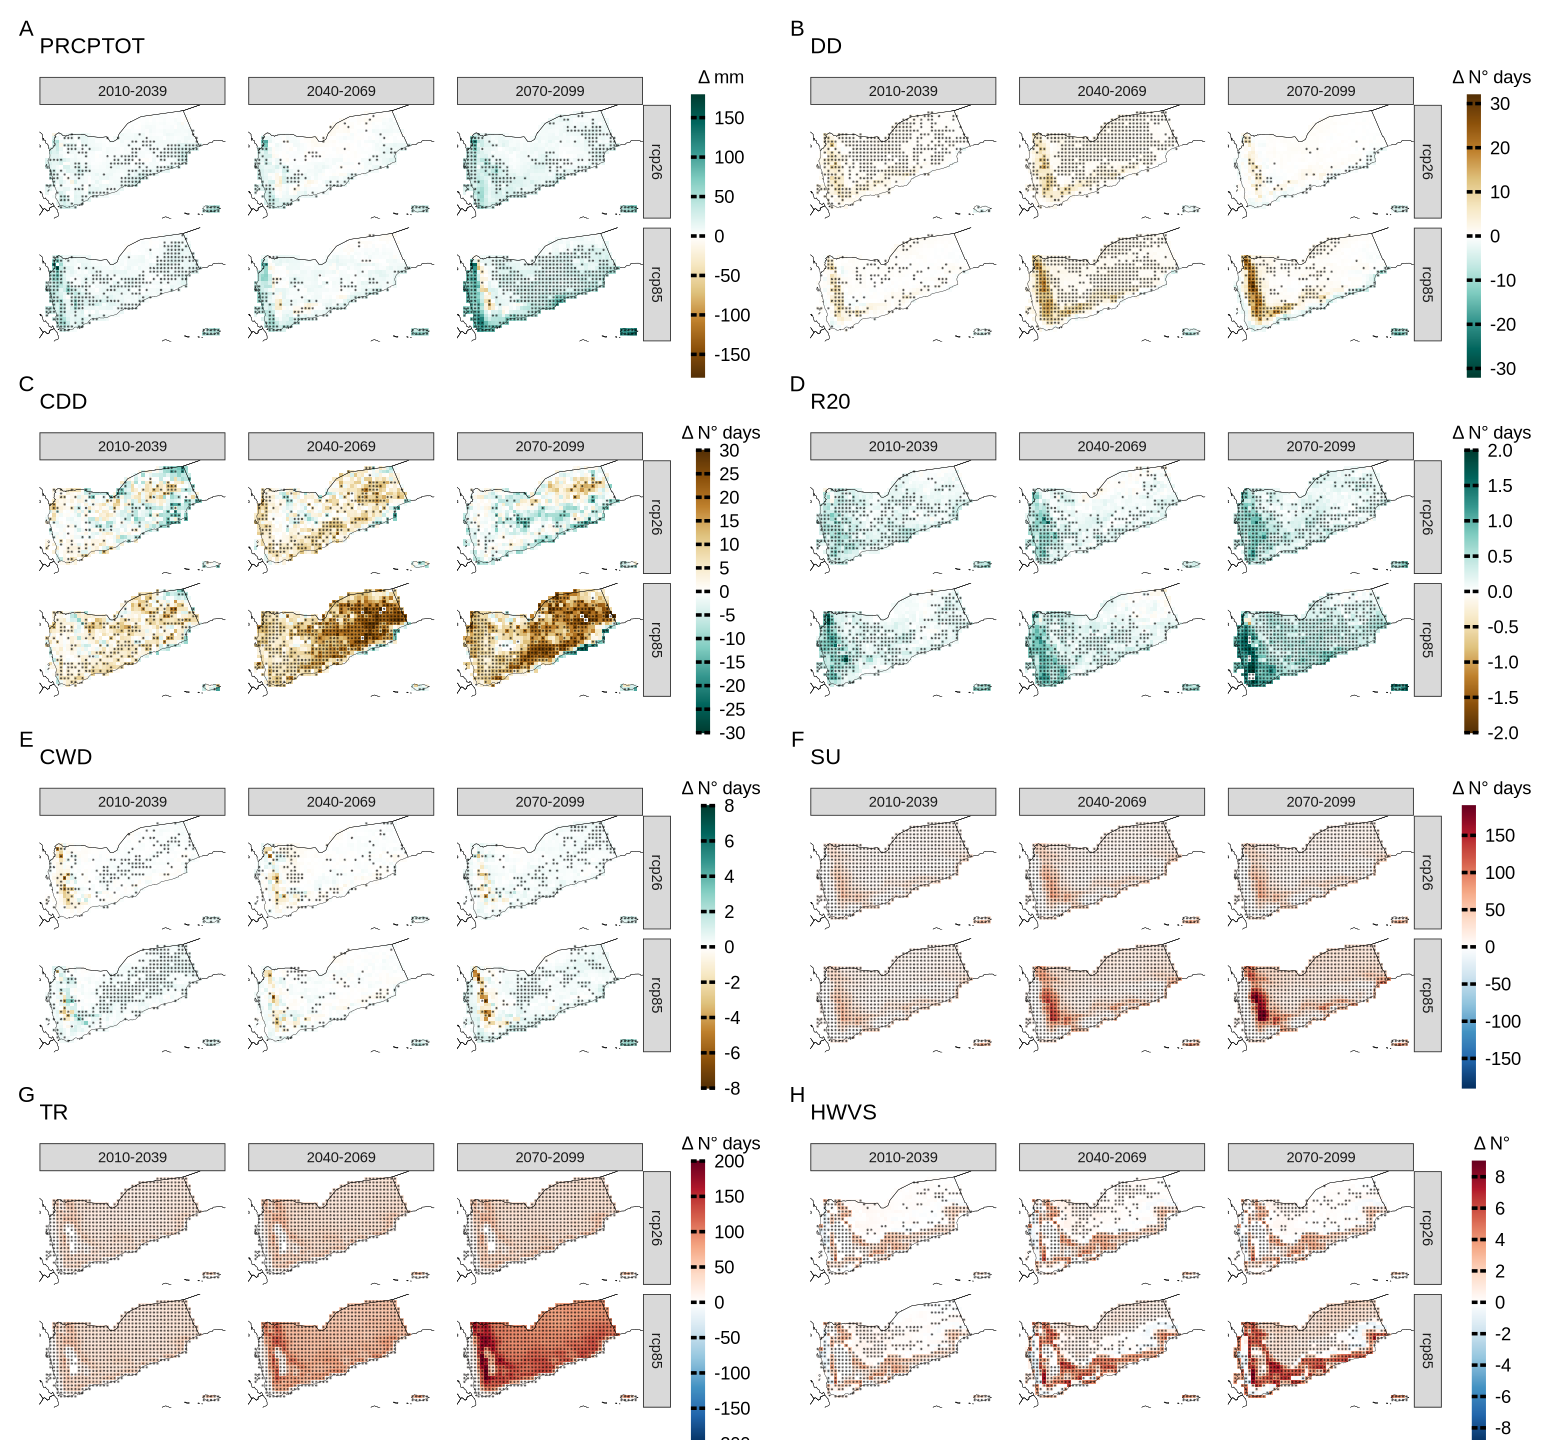

In [164]:
options(repr.plot.width = 13, repr.plot.height = 12)
fig5=a1+a2+a3+b1+b2+b3+c1+c2+c3+d1+d2+d3+e1+e2+e3+f1+f2+f3+g1+g2+g3+h1+h2+h3+
plot_layout(ncol=6,tag_level = 'new')+ plot_annotation(tag_levels = 'A')
fig5

In [163]:
ggsave(fig5, filename = "F_5.png", width = 13, height = 12)